# Project: Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this analsys project I selected the socor database and select plyer tables to descover the height, weight and sprint speed.
also to descover the common between weight and speed
<br>
### Questions
> <a href='#q1'>Question 1 What are the statistics numbers of height, weight and speed of all palyer</a><br>
> <a href='#q2'>Question 2 What the common between weight and speed</a><br>
> <a href='#q3'>Question 3 What are the names of the top 10 tallest & the shortest players in the dataset?</a><br>
> <a href='#q4'>Question 4 What is the name of fastest player and what is his speed?</a><br>
> <a href='#q5'>Question 5 What is the name of slowest player and what is his speed?</a><br>
> <a href='#q6'>Question 6 Which foot is the most preferred foot among the players?</a><br>
> <a href='#q7'>Question 7 Which foot is the preferred foot among the tallest top 5 players?</a><br>
> <a href='#q8'>Question 8 Which foot is the preferred foot among the 5 shortest players?</a><br>
> <a href='#q9'>Question 9 What are the most fisrt names are players have?</a><br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# import sqlite3 library
import sqlite3
# mkae connection to the datebase
con = sqlite3.connect('database.sqlite')

In [3]:
# query to show the tables in the datebase
tables = pd.read_sql('SELECT * FROM sqlite_master;', con)

In [4]:
# display the tables to choose the tables that we will work on them
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,index,sqlite_autoindex_Player_1,Player,15,None
4,index,sqlite_autoindex_Player_2,Player,17,None
5,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
6,index,sqlite_autoindex_Match_1,Match,19,None
7,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
8,index,sqlite_autoindex_League_1,League,25,None
9,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...


In [5]:
# I select two tables to work on; Player_Attributes & Player
# assign two virables to them as below and use read_sql to read the table from database
player_attributes = pd.read_sql('SELECT * FROM Player_Attributes;', con)
player = pd.read_sql('SELECT * FROM Player;', con)

In [6]:
# to see the columns names and types, how many colunns and rows, and to discover how many null in each columns
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [7]:
# to have a brife lool on the data in player_attributes
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [8]:
# to see the columns names and types, how many colunns and rows, and to discover how many null in each columns
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [9]:
# to have a brife lool on the data in player
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [10]:
# select the column of player_fifa_api_id, preferred_foot & sprint_speed that I will do the analysis on for player_attributes DataFrame
# instead of drop the others columns
player_attributes_cols = ['player_fifa_api_id','sprint_speed', 'preferred_foot']
player_attributes = player_attributes[player_attributes_cols]

In [11]:
# Display player_attributes DataFrame
player_attributes.head()

,player_fifa_api_id,sprint_speed,preferred_foot
0,218353,64.0,right
1,218353,64.0,right
2,218353,64.0,right
3,218353,64.0,right
4,218353,64.0,right


In [12]:
# drop id & player_api_id from player DataFrame

player.drop(['id', 'player_api_id', 'birthday'], axis=1, inplace=True)

In [13]:
# Display player DataFrame

player.head()

,player_name,player_fifa_api_id,height,weight
0,Aaron Appindangoye,218353,182.88,187
1,Aaron Cresswell,189615,170.18,146
2,Aaron Doran,186170,170.18,163
3,Aaron Galindo,140161,182.88,198
4,Aaron Hughes,17725,182.88,154


In [14]:
# check the null in player_attributes
player_attributes.isna().sum()

player_fifa_api_id      0
sprint_speed          836
preferred_foot        836
dtype: int64

In [15]:
# deletd the null in player_attributes
player_attributes.dropna(inplace=True)

In [16]:
# have a look on the player_attributes data befor run drop_duplicates next
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   player_fifa_api_id  183142 non-null  int64  
 1   sprint_speed        183142 non-null  float64
 2   preferred_foot      183142 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ MB


In [17]:
# drop duplicates of player_attributes
player_attributes.drop_duplicates(inplace=True)

In [18]:
# have a look on the player_attributes data after run drop_duplicates
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48305 entries, 0 to 183977
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_fifa_api_id  48305 non-null  int64  
 1   sprint_speed        48305 non-null  float64
 2   preferred_foot      48305 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ MB


In [19]:
# check the null in player
player.isna().sum()

player_name           0
player_fifa_api_id    0
height                0
weight                0
dtype: int64

In [20]:
# have a look on the player data befor run drop_duplicates next
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_name         11060 non-null  object 
 1   player_fifa_api_id  11060 non-null  int64  
 2   height              11060 non-null  float64
 3   weight              11060 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 345.8+ KB


In [21]:
# drop duplicates of player
player.drop_duplicates(inplace=True)

In [22]:
# have a look on the player data after run drop_duplicates
player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 0 to 11059
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_name         11060 non-null  object 
 1   player_fifa_api_id  11060 non-null  int64  
 2   height              11060 non-null  float64
 3   weight              11060 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 432.0+ KB


In [23]:
# make new DataFrame by merge the two DataFermas player_attributes & player
player_information = pd.merge(player, player_attributes)

In [24]:
# Display the new DataFrame player_information
player_information.head(10)

,player_name,player_fifa_api_id,height,weight,sprint_speed,preferred_foot
0,Aaron Appindangoye,218353,182.88,187,64.0,right
1,Aaron Cresswell,189615,170.18,146,78.0,left
2,Aaron Cresswell,189615,170.18,146,82.0,left
3,Aaron Cresswell,189615,170.18,146,81.0,left
4,Aaron Cresswell,189615,170.18,146,72.0,left
5,Aaron Cresswell,189615,170.18,146,47.0,left
6,Aaron Cresswell,189615,170.18,146,46.0,left
7,Aaron Cresswell,189615,170.18,146,59.0,left
8,Aaron Cresswell,189615,170.18,146,59.0,right
9,Aaron Doran,186170,170.18,163,74.0,right




### Drop duplicates in the new DataFrame player_information in player_name columns

In [25]:
# first I sort the speed to keep the greatest number that player has recored
player_information = player_information.sort_values(by=['sprint_speed'], ascending=False)

In [26]:
# take a look on the data
player_information.head(20)

,player_name,player_fifa_api_id,height,weight,sprint_speed,preferred_foot
31103,Mathis Bolly,190490,185.42,170,97.0,right
10570,David Odonkor,61,172.72,163,97.0,right
22669,Jonathan Biabiany,184312,177.80,161,96.0,right
31102,Mathis Bolly,190490,185.42,170,96.0,right
44506,Theo Walcott,164859,175.26,150,96.0,right
10569,David Odonkor,61,172.72,163,96.0,right
37736,Pierre-Emerick Aubameyang,188567,187.96,176,96.0,right
15935,Gabriel Agbonlahor,164469,180.34,174,96.0,right
19604,Ivan Cordoba,16619,172.72,161,96.0,right
31104,Mathis Bolly,190490,185.42,170,95.0,right


In [27]:
# drop the duplicate names and keep the first value which contains of the greates number
player_information =player_information.drop_duplicates(subset='player_name', keep="first")

In [28]:
# take a look on the data
player_information.head(20)

,player_name,player_fifa_api_id,height,weight,sprint_speed,preferred_foot
31103,Mathis Bolly,190490,185.42,170,97.0,right
10570,David Odonkor,61,172.72,163,97.0,right
22669,Jonathan Biabiany,184312,177.80,161,96.0,right
44506,Theo Walcott,164859,175.26,150,96.0,right
37736,Pierre-Emerick Aubameyang,188567,187.96,176,96.0,right
15935,Gabriel Agbonlahor,164469,180.34,174,96.0,right
19604,Ivan Cordoba,16619,172.72,161,96.0,right
18349,Hector Bellerin,203747,177.80,163,95.0,right
38012,Quincy Owusu-Abeyie,162896,180.34,165,95.0,right
43,Aaron Lennon,152747,165.10,139,95.0,right


> ### Summary
<br>
I import sqlite library then connect to the database.<br>
Then I write a query statement to show the tables that art in the database and choose two tables to work on.<br>
I select two tables to work on; Player_Attributes & Player<br>
By useing read_sql I assign two virables to the two tables, player and player_attributes<br>
Drop duplicates and null values form the two datesets<br>
Merge them to one DataFrame as player_information<br>

<a id='eda'></a>
## Exploratory Data Analysis


<a id='q1'></a>
### Research Question 1 What are the statistics numbers of height, weight and speed of all palyer?

> #### First I use describe method to have brief look on the data

In [29]:
player_information.describe()

,player_fifa_api_id,height,weight,sprint_speed
count,10848.000000,10848.000000,10848.000000,10848.000000
mean,165473.344856,181.844847,168.328632,72.332596
std,58834.503325,6.364012,14.988153,11.181243
min,2.000000,157.480000,117.000000,17.000000
25%,150675.750000,177.800000,159.000000,67.000000
50%,184623.500000,182.880000,168.000000,74.000000
75%,203877.500000,185.420000,179.000000,80.000000
max,234141.000000,208.280000,243.000000,97.000000


> #### print the players name of the hightest numbers 

In [30]:
# make function to do the query
def player_query(measure, operator, number):
    if measure not in ['height', 'weight', 'sprint_speed']:
        return 'Choose one of the measures are height, weight or sprint_speed'
    return player_information.query('{} {} {}'.format(measure, operator, number))

In [31]:
# the tallest player
player_query('height', '>', '208')

,player_name,player_fifa_api_id,height,weight,sprint_speed,preferred_foot
25907,Kristof van Hout,185306,208.28,243,42.0,right


In [32]:
# the heaviest players
player_query('weight', '==', '243')

,player_name,player_fifa_api_id,height,weight,sprint_speed,preferred_foot
45118,Tim Wiese,53012,193.04,243,52.0,right
25907,Kristof van Hout,185306,208.28,243,42.0,right


In [33]:
# the speedest players
player_query('sprint_speed', '==', '97')

,player_name,player_fifa_api_id,height,weight,sprint_speed,preferred_foot
31103,Mathis Bolly,190490,185.42,170,97.0,right
10570,David Odonkor,61,172.72,163,97.0,right


> #### print the players name of the lowest numbers
> #### I used the same function above, it works :)

In [34]:
# the shortest player
player_query('height', '==', '157.48')

,player_name,player_fifa_api_id,height,weight,sprint_speed,preferred_foot
23966,Juan Quero,171126,157.48,117,90.0,right


In [35]:
# the lightest players
player_query('weight', '==', '117')

,player_name,player_fifa_api_id,height,weight,sprint_speed,preferred_foot
23966,Juan Quero,171126,157.48,117,90.0,right


In [36]:
# the lower players
player_query('sprint_speed', '==', '17')

,player_name,player_fifa_api_id,height,weight,sprint_speed,preferred_foot
23781,Josip Posavec,232350,190.5,181,17.0,right


<a id='q2'></a>
### Research Question 2  What the common between weight and speed?

In [37]:
# check the weight over 190
player_query('weight',  '>', '190')

,player_name,player_fifa_api_id,height,weight,sprint_speed,preferred_foot
13218,Emmanuel Emenike,199835,182.88,198,91.0,right
43985,Steven Whittaker,122574,185.42,192,90.0,right
8135,Claude Gnakpa,156004,182.88,192,90.0,right
32170,Michael Ballack,3647,187.96,194,88.0,right
39220,Richard Sukuta-Pasu,183920,185.42,214,88.0,right
...,...,...,...,...,...,...
9104,Dani Hernandez,189586,195.58,196,26.0,right
38112,Radoslaw Janukiewicz,165615,190.50,196,25.0,right
16949,Gideao,208826,190.50,209,22.0,right
26680,Leonard Nienhuis,199172,182.88,198,21.0,right


In [38]:
# check the weight over 190  and speed over 90
player_information.query('sprint_speed > 90').query('weight > 190')

,player_name,player_fifa_api_id,height,weight,sprint_speed,preferred_foot
13218,Emmanuel Emenike,199835,182.88,198,91.0,right


<a id='q3'></a>
### Research Question 3 What are the names of the top 10 tallest & the shortest players in the dataset?

> The tallest players

In [39]:
player_information.sort_values('height', ascending=False)[:10][['player_name', 'height']]

,player_name,height
25907,Kristof van Hout,208.28
48185,Zeljko Kalac,203.20
14423,Fejsal Mulic,203.20
35167,Nikola Zigic,203.20
37798,Pietro Marino,203.20
24461,Jurgen Wevers,203.20
43325,Stefan Maierhofer,203.20
25476,Kevin Vink,203.20
26060,Lacina Traore,203.20
8448,Costel Pantilimon,203.20


> The shortest players

In [40]:
player_information.sort_values('height', ascending=True)[:10][['player_name', 'height']]

,player_name,height
23966,Juan Quero,157.48
31781,Maxi Moralez,160.02
11516,Diego Buonanotte,160.02
27196,Lorenzo Insigne,162.56
15157,Fouad Rachid,162.56
4793,Bakari Kone,162.56
3645,Anthony Deroin,162.56
38001,Quentin Othon,162.56
41207,Samuel Asamoah,162.56
12539,Edgar Salli,162.56


<a id='q4'></a>
### Research Question 4 What is the name of fastest player and what is his speed?

In [41]:
player_information.sort_values('sprint_speed', ascending=False)[:1][['player_name', 'sprint_speed']]

,player_name,sprint_speed
31103,Mathis Bolly,97.0


<a id='q5'></a>
### Research Question 5 What is the name of slowest player and what is his speed?

In [42]:
player_information.sort_values('sprint_speed', ascending=True)[:1][['player_name', 'sprint_speed']]

,player_name,sprint_speed
23781,Josip Posavec,17.0


<a id='q6'></a>
### Research Question 6 Which foot is the most preferred foot among the players?

In [43]:
player_information['preferred_foot'].value_counts()

right    8187
left     2661
Name: preferred_foot, dtype: int64

<a id='q7'></a>
### Research Question 7 Which foot is the preferred foot among the tallest top 5 players?

In [44]:
player_information.sort_values('height', ascending=False)[:5][['player_name', 'height', 'preferred_foot']]

,player_name,height,preferred_foot
25907,Kristof van Hout,208.28,right
48185,Zeljko Kalac,203.20,right
14423,Fejsal Mulic,203.20,right
35167,Nikola Zigic,203.20,right
37798,Pietro Marino,203.20,right


<a id='q8'></a>
### Research Question 8 Which foot is the preferred foot among the 5 shortest players?

In [45]:
player_information.sort_values('height', ascending=True)[:5][['player_name', 'height', 'preferred_foot']]

,player_name,height,preferred_foot
23966,Juan Quero,157.48,right
31781,Maxi Moralez,160.02,right
11516,Diego Buonanotte,160.02,left
27196,Lorenzo Insigne,162.56,right
15157,Fouad Rachid,162.56,right


<a id='q9'></a>
### Research Question 9 What are the most fisrt names are players have?

In [46]:
# asign the virable names to the first name of each player
names = player_information['player_name'].apply(lambda row: row[:row.find(' ')])

In [47]:
# import Counter from collections to count the names then asign counts to the dictionary and sort it
from collections import Counter
counts = Counter(names)
counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:10]
counts

[('David', 122),
 ('Daniel', 85),
 ('Kevin', 82),
 ('Michael', 75),
 ('Marco', 74),
 ('Jose', 64),
 ('Christian', 52),
 ('Jonathan', 51),
 ('Carlos', 49),
 ('Bruno', 48)]

 ### Visualization 

In [48]:
def visualization_function(column_name):
    # pylab to add title to the hist
    import pylab as pl
    pl.suptitle(column_name.replace("_", " ").title())
    if len(player_information[column_name].value_counts()) <= 3:
        x = player_information[column_name].hist(bins=3, xlabelsize=12, ylabelsize=12, grid=False, figsize=(5,5), color='#86bf91', zorder=2, rwidth=0.9)
        x.set_xlabel('X')
        x.set_xlabel('Y')
    x = player_information[column_name].hist(bins=11, xlabelsize=12, ylabelsize=12, grid=False, figsize=(5,5), color='#86bf91', zorder=2, rwidth=0.9)
    x.set_xlabel(f'{column_name.replace("_", " ").title()}')
    x.set_ylabel(f'Count of players')

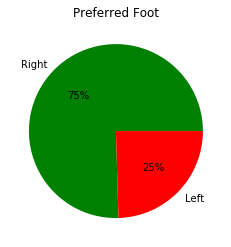

In [49]:
# bar chart
# visualization_function('preferred_foot')

# pie chart
preferred_foot_X = []
preferred_foot_labels = []
for key, value in dict(player_information['preferred_foot'].value_counts()).items():
    preferred_foot_labels.append(key.capitalize())
    preferred_foot_X.append(value)

fig, ax = plt.subplots()

ax.pie(x=preferred_foot_X, labels=preferred_foot_labels, colors=['green', 'red'], autopct='%.0f%%')
ax.set_title('Preferred Foot')
plt.show()

In [50]:
preferred_foot_labels

['Right', 'Left']

In [51]:
# to see the presentage of right and left foot
len_players = len(player_information['preferred_foot']) 
len_right_foot_players = player_information['preferred_foot'].value_counts()[0]
len_left_foot_players = player_information['preferred_foot'].value_counts()[1]

right_presentage = len_right_foot_players / len_players
left_presentage = len_left_foot_players / len_players

print(f'The persentage of right foot palyer is {round(right_presentage, 3) * 100}%\n\
The persentage of left foot palyer is {round(left_presentage, 3) * 100}%')

The persentage of right foot palyer is 75.5%
The persentage of left foot palyer is 24.5%


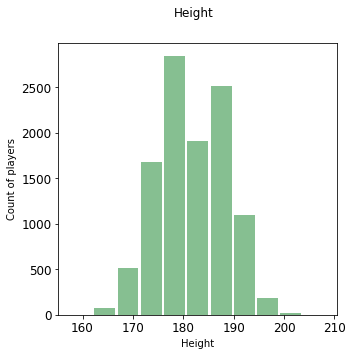

In [52]:
visualization_function('height')

In [53]:
# the average of height
player_information['height'].mean()

181.84484697639485

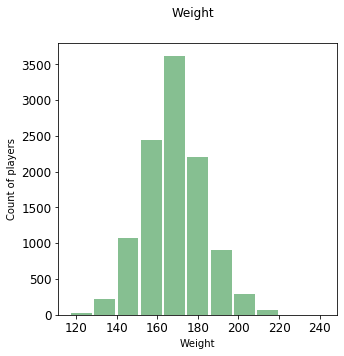

In [54]:
visualization_function('weight')

In [55]:
# the average of weight
player_information['weight'].mean()

168.3286320058997

## Conclusions
<a id='conclusions'></a>

<h5>Most of players preferred <span style="color: green">right</span> foot</h5>
<h5>The persentage of right foot palyer is 75.5%</h5>
<br>
<h5>The persentage of left foot palyer is 24.5%</h5>
<h5>The average of height of the players is <span style="color: green">181.84</span> cm.</h5>

<h5>The average of weight of the players is <span style="color: green">168.32</span> pound.</h5>

<h5><span style='color: green'>David</span> is the top name that player have with <span style='color: green'>122</span> player then <span style='color: green'>Daniel</span> with <span style='color: green'>85</span>.</h5>



## Limitations

<h6>
    The dataset not include the country of players that could add useful analysit and info.
</h6>

<h6>
    Some data are dublicted for players
</h6>

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0